In [1]:
%reset -f

In [2]:
import tensorflow as tf
import time

print(tf.__version__)

1.12.0


In [3]:
import os
import numpy as np
npzfile=np.load('rawtrainfile.npz')
npzfile.files

images=npzfile['arr_0']
labels=npzfile['arr_1']




In [4]:
npimages=np.array(images)
nplabels=np.array(labels)
print('images shape: {} \n labels shape: {}'.format(npimages.shape, nplabels.shape))
print('first image shape: {} \n first eleven label shape: {}'.format(npimages[0].shape, nplabels[0:10]))


images shape: (39209,) 
 labels shape: (39209,)
first image shape: (30, 29, 3) 
 first eleven label shape: [0 0 0 0 0 0 0 0 0 0]


In [5]:
from skimage.transform import resize

images48 = [resize(image, (48, 48)) for image in npimages]
print(type(images48))


C:\Users\asmna\Documents\Python\envs\tfgpu\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\asmna\Documents\Python\envs\tfgpu\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<class 'list'>


In [6]:
images48 = np.array(images48)
print('total number of images and size {}'.format(images48.shape))
print(images48[0].shape)

total number of images and size (39209, 48, 48, 3)
(48, 48, 3)


In [7]:
import keras
from keras.layers import Input, Embedding, GRU, LSTM, MaxPooling2D, CuDNNGRU, CuDNNLSTM, Reshape
from keras.layers import Dropout, Dense, Activation, Flatten,Conv2D,  BatchNormalization
from keras.models import Sequential
from keras.layers import LSTM  


model = Sequential()
model.add(Conv2D(1, kernel_size=(1, 1),padding='valid', strides=1, activation='relu', input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Conv2D(29, 5, padding='valid', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(3,  padding='valid',strides=2))
model.add(Dropout(0.1))
                 
model.add(Conv2D(59, 3,  padding='valid',strides=1, activation='relu')) # increase kernel size to 5
model.add(BatchNormalization())
model.add(MaxPooling2D(3,strides=2,  padding='valid'))
model.add(Dropout(0.1))

model.add(Conv2D(74, 3, strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(3,strides=2,  padding='valid')) 
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(300))
model.add(Dropout(0.5))
model.add(Dense(225))
model.add(Dropout(0.5))
model.add(Reshape((15, 15)))
#model.add(LSTM(86, dropout=0.1, recurrent_dropout=0.5)) # defaults inclide tanh activation
model.add(CuDNNGRU(86))
model.add(Dense(43, activation='softmax'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 1)         4         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 1)         4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 29)        754       
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 29)        116       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 29)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 29)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 59)        15458     
__________

In [8]:
## Training plot

import matplotlib.pyplot as plt

traffic_signs = [250, 2120, 3400, 6500,9000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    #plt.imshow(images27[traffic_signs[i]], cmap="gray")
    plt.imshow(images48[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

<Figure size 640x480 with 5 Axes>

In [9]:

X_train=images48.astype('float32')

print(X_train.shape)

#nplabels=np.array(labels)
print("First label is %s and Total labels shape are %s" %(nplabels[0], nplabels.shape))


Y = keras.utils.to_categorical(nplabels,43)

print("after one hot coding Labels shape is:",Y.shape)
print("First Label after one hot coding:",Y[0])

(39209, 48, 48, 3)
First label is 0 and Total labels shape are (39209,)
after one hot coding Labels shape is: (39209, 43)
First Label after one hot coding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
import pandas as pd
import os
import numpy as np
npzfilet=np.load('rawtestfile.npz')
npzfilet.files

X_test=npzfilet['arr_0']
y_test=npzfilet['arr_1']



test_images = np.array(X_test)
test_labels = np.array(y_test)


In [11]:
test_images.shape

(12630,)

In [12]:
from skimage import transform
from skimage.color import rgb2gray

test_imagesnp=np.array(test_images)
    

# Transform the images to 28 by 28 pixels
test_images48 = [transform.resize(image, (48, 48)) for image in test_imagesnp]



C:\Users\asmna\Documents\Python\envs\tfgpu\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\asmna\Documents\Python\envs\tfgpu\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


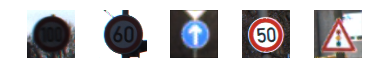

In [13]:
import matplotlib.pyplot as plt

testsigns = [150, 700, 1100, 1500,5000]

for i in range(len(testsigns)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    #plt.imshow(images27[traffic_signs[i]], cmap="gray")
    plt.imshow(test_images48[testsigns[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [14]:
tnpimages=np.array(test_images48)
tnplabels=np.array(test_labels)
print('images shape: {} \n labels shape: {}'.format(tnpimages.shape, tnplabels.shape))
print('first image shape: {} \n first eleven label shape: {}'.format(tnpimages[0].shape, tnplabels[0:10]))


images shape: (12630, 48, 48, 3) 
 labels shape: (12630,)
first image shape: (48, 48, 3) 
 first eleven label shape: [16  1 38 33 11 38 18 12 25 35]


In [15]:
#X_test=test_images27
X_test=tnpimages.astype('float32')

Y_test = keras.utils.to_categorical(tnplabels,43)


In [16]:

start_time = time.time()
print('Start time in seconds is : {}'.format(start_time))

Start time in seconds is : 1552482748.7153661


In [17]:


model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']) 

epoch=150
history=model.fit(X_train, Y, validation_data=(X_test, Y_test),epochs=epoch, batch_size=128, shuffle=True, verbose=1)


Train on 39209 samples, validate on 12630 samples
Epoch 1/150
39209/39209 [==============================] - 19s 490us/step - loss: 2.1926 - acc: 0.3837 - val_loss: 1.6687 - val_acc: 0.5453
Epoch 2/150
39209/39209 [==============================] - 14s 365us/step - loss: 0.6589 - acc: 0.8027 - val_loss: 0.4009 - val_acc: 0.8664
Epoch 3/150
39209/39209 [==============================] - 14s 361us/step - loss: 0.3249 - acc: 0.9066 - val_loss: 0.2280 - val_acc: 0.9356
Epoch 4/150
39209/39209 [==============================] - 14s 360us/step - loss: 0.1842 - acc: 0.9525 - val_loss: 0.1747 - val_acc: 0.9553
Epoch 5/150
39209/39209 [==============================] - 14s 361us/step - loss: 0.1217 - acc: 0.9677 - val_loss: 0.2549 - val_acc: 0.9314
Epoch 6/150
39209/39209 [==============================] - 14s 359us/step - loss: 0.0922 - acc: 0.9761 - val_loss: 0.1678 - val_acc: 0.9578
Epoch 7/150
39209/39209 [==============================] - 14s 356us/step - loss: 0.0685 - acc: 0.9821 - val_l

Epoch 59/150
39209/39209 [==============================] - 14s 368us/step - loss: 0.0041 - acc: 0.9989 - val_loss: 0.1132 - val_acc: 0.9806
Epoch 60/150
39209/39209 [==============================] - 14s 368us/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.0969 - val_acc: 0.9812
Epoch 61/150
39209/39209 [==============================] - 14s 364us/step - loss: 0.0047 - acc: 0.9985 - val_loss: 0.1095 - val_acc: 0.9808
Epoch 62/150
39209/39209 [==============================] - 15s 388us/step - loss: 0.0054 - acc: 0.9984 - val_loss: 0.0937 - val_acc: 0.9823
Epoch 63/150
39209/39209 [==============================] - 14s 362us/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.0960 - val_acc: 0.9820
Epoch 64/150
39209/39209 [==============================] - 15s 373us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.1000 - val_acc: 0.9823
Epoch 65/150
39209/39209 [==============================] - 14s 362us/step - loss: 0.0039 - acc: 0.9989 - val_loss: 0.0969 - val_acc: 0.9810
Epoch 66/150


Epoch 117/150
39209/39209 [==============================] - 14s 366us/step - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0863 - val_acc: 0.9827
Epoch 118/150
39209/39209 [==============================] - 14s 362us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.0810 - val_acc: 0.9840
Epoch 119/150
39209/39209 [==============================] - 16s 401us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0903 - val_acc: 0.9826
Epoch 120/150
39209/39209 [==============================] - 15s 372us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0878 - val_acc: 0.9846
Epoch 121/150
39209/39209 [==============================] - 14s 369us/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0963 - val_acc: 0.9808
Epoch 122/150
39209/39209 [==============================] - 14s 364us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0847 - val_acc: 0.9839
Epoch 123/150
39209/39209 [==============================] - 14s 363us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0859 - val_acc: 0.9846
Epoch 

In [18]:
print("Total time to run %s seconds" % (time.time() - start_time))


Total time to run 2215.344093799591 seconds


In [19]:

print('final learning rate',keras.backend.eval(model.optimizer.lr))

v=history.history['val_acc']
test_accuracy=v[-10 :]
print('test accuracy average for 10 epochs is :', sum(test_accuracy) / len(test_accuracy))


final learning rate 1.0
test accuracy average for 10 epochs is : 0.9829532858122935


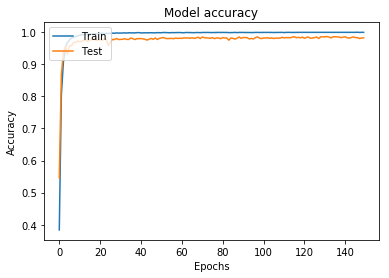

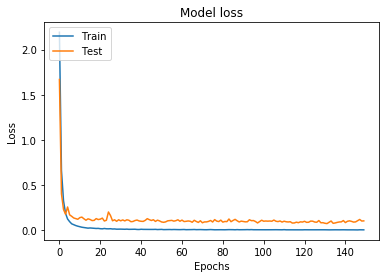

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
# y_prob = model.predict(tnpimages)
# y_prob[1]

In [22]:
ypred=model.predict_classes(tnpimages)
tnplabels[10]

12

In [23]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(tnplabels, ypred)
print(cm)

[[ 60   0   0 ...   0   0   0]
 [  0 718   0 ...   0   0   0]
 [  0   3 747 ...   0   0   0]
 ...
 [  0   1   0 ...  77   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   0 ...   0   2  87]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(tnplabels, ypred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      1.00      0.99       720
           2       1.00      1.00      1.00       750
           3       0.97      0.98      0.98       450
           4       1.00      0.99      1.00       660
           5       0.98      0.99      0.99       630
           6       0.98      0.97      0.98       150
           7       0.98      0.99      0.99       450
           8       0.99      0.95      0.97       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      1.00       660
          11       0.99      1.00      0.99       420
          12       0.97      0.98      0.97       690
          13       0.99      0.99      0.99       720
          14       0.99      1.00      1.00       270
          15       0.99      1.00      1.00       210
          16       0.99      1.00      0.99       150
          17       1.00    

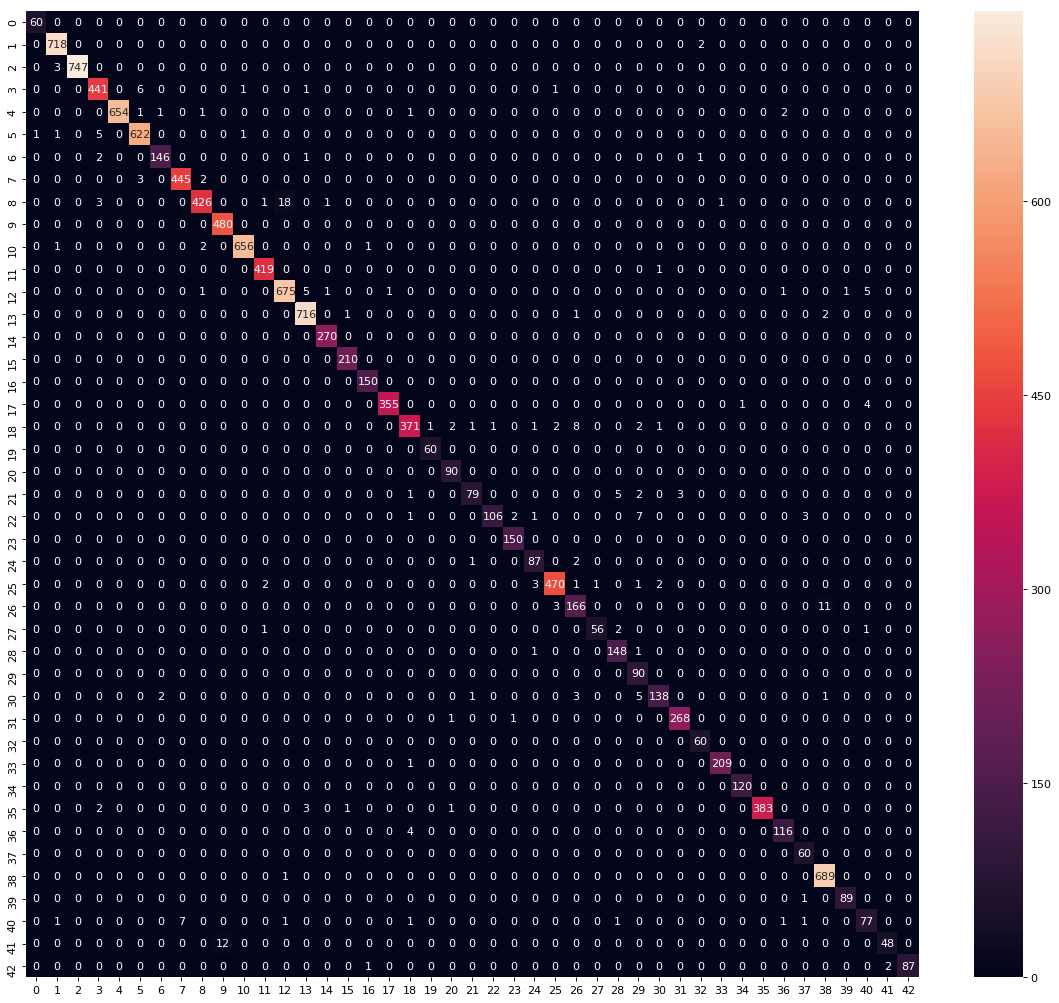

In [25]:
import seaborn as sns
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


sns.heatmap(confusion_matrix(tnplabels, ypred),annot=True,fmt="d") 


In [26]:
data1=tnpimages


98.23436262866193
91.23515440845716
84.75059383744204
79.19239904799352
74.69517023527519
70.68091845663407
67.40300872169217
65.14647663253126
62.23277907945387
60.01583531369129
57.71179729383896
55.37608868530225
53.84798100895101
52.12984956830433
50.482977057673686
48.915281078217056
47.42676167476772
45.88281869086026
44.06175772254654
43.539192392914806


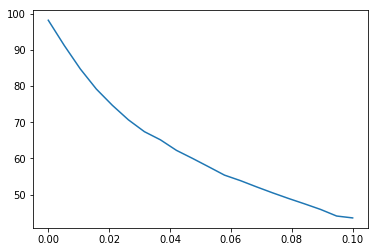

In [27]:
## gaussian noise evaluation

from skimage.util import random_noise
from skimage import transform
import matplotlib.pyplot as plt

import numpy as np
vara=np.linspace(0, 0.1, 20)
i=0
b=np.zeros((len(vara),1))
for a in vara:

  gaussian_noise_imgs = [random_noise(image, mode='gaussian',mean=0,var=a,seed=None, clip=True) for image in data1]
  gaussian_noise_imgs=np.array(gaussian_noise_imgs)
  
  gaussian_noise_imgs=gaussian_noise_imgs.astype('float32')
  score = model.evaluate(gaussian_noise_imgs, Y_test, batch_size=128, verbose=0)
  b[i]=score[1]*100
  i+=1

  print(score[1]*100)
  
 
fig, ax = plt.subplots()
ax.plot(vara, b)

  
 

In [28]:

data2=tnpimages

In [29]:

sd1=[10, 10,10]
sd2=[20, 20,20]
sd3=[30, 30,30]
sd4=[40, 40,40]
sd5=[50, 50,50]
sd6=[6.3, 6.3, 6.3]
sd7=[12.75, 12.75, 12.75]
sd8=[19.21, 19.21, 19.21]
sdrange=[sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8]


nprn=np.zeros(3)

for sd in sdrange:
  i=0
  for values in sd:
      nsd=values/255
      varsd=nsd*nsd
      gaussian_noise_imgs = [random_noise(image, mode='gaussian',mean=0,var=varsd,seed=None, clip=True) for image in data2]
      gaussian_noise_imgs=np.array(gaussian_noise_imgs)
      
      gaussian_noise_imgs=gaussian_noise_imgs.astype('float32')
      score = model.evaluate(gaussian_noise_imgs, Y_test, batch_size=128, verbose=0)
      print('Accuracy is:', score[1], 'for sd', values)  
      nprn[i]=score[1]
      i+=1

      

  avgsd=nprn
  print(' accuracy average is :', sum(avgsd) / len(avgsd))


Accuracy is: 0.9635787806054098 for sd 10
Accuracy is: 0.9649247821511867 for sd 10
Accuracy is: 0.9644497228065183 for sd 10
 accuracy average is : 0.9643177618543716
Accuracy is: 0.9016627078290412 for sd 20
Accuracy is: 0.896357877907636 for sd 20
Accuracy is: 0.899129057789453 for sd 20
 accuracy average is : 0.8990498811753768
Accuracy is: 0.8094220111035961 for sd 30
Accuracy is: 0.8069675377410079 for sd 30
Accuracy is: 0.8119556612564474 for sd 30
 accuracy average is : 0.8094484033670172
Accuracy is: 0.7215360252043602 for sd 40
Accuracy is: 0.723752969281596 for sd 40
Accuracy is: 0.7235154395526303 for sd 40
 accuracy average is : 0.7229348113461955
Accuracy is: 0.6432304039892467 for sd 50
Accuracy is: 0.6381631035797197 for sd 50
Accuracy is: 0.6384006332709312 for sd 50
 accuracy average is : 0.6399313802799659
Accuracy is: 0.9757719714209284 for sd 6.3
Accuracy is: 0.975138558873277 for sd 6.3
Accuracy is: 0.9766429136597912 for sd 6.3
 accuracy average is : 0.9758511479

psnr of original image and true image : 14.148861040288892
float64
float64


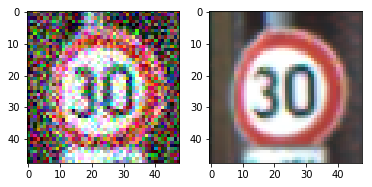

In [30]:
  #psnr calculatioon
  
  import skimage
  import numpy as np
  from skimage import img_as_float
  b=1
  
  a = random_noise(tnpimages[b], mode='gaussian',mean=0,var=0.05,seed=None, clip=True) 
  plt.subplot(1, 2,1)
  plt.imshow(a)
  plt.subplot(1, 2,2)
  c=tnpimages[b]
  plt.imshow(c)
  imtrue=img_as_float(c)
  imtest=a
  print('psnr of original image and true image :',skimage.measure.compare_psnr(imtrue, imtest, data_range=None))
  
  print(imtrue.dtype)
  print(imtest.dtype)

In [31]:

model.save('keras4_Cudnngru_adadelta_pooldrop.h5')